*Importing Libraries*
- numpy: Used for numerical operations, such as generating random data.
- scipy.stats: Provides statistical functions, including the t-test.
- matplotlib.pyplot: Used for plotting graphs.

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Ensures reproducibility. The random numbers generated will be the same every time the code is run.

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

Defining the parameters

- sample_size: Number of observations in each group.
- effect_size: The true difference between the means of the two groups. Here, it’s set to 0.5.
- alpha: The significance level (probability threshold for rejecting the null hypothesis). Commonly set to 0.05.
- num_simulations: Number of times the experiment is repeated to estimate error rates.

In [3]:
# Parameters
sample_size = 30  # Sample size for each group
effect_size = 0.5  # Effect size (difference between groups)
alpha = 0.05  # Significance level
num_simulations = 1000  # Number of simulations to run

- We perform an independent t-test to compare the means of two groups.
- Input: Two arrays (group1 and group2).
- Output: The p-value, which indicates the probability of observing the data if the null hypothesis is true.

In [4]:
# Function to perform a t-test and return p-value
def perform_ttest(group1, group2):
    t_stat, p_value = stats.ttest_ind(group1, group2)
    return p_value

*Steps:*
- Generate two groups from the same distribution (no true effect).
- Perform a t-test to compare the groups.
- Count how often the p-value is less than alpha (incorrectly rejecting the null hypothesis).
- Calculate the Type I error rate as the proportion of false positives.

In [5]:
# Simulate Type I Error (False Positive)
def simulate_type1_error():
    type1_errors = 0
    for _ in range(num_simulations):
        # Generate two samples from the same distribution (no effect)
        group1 = np.random.normal(loc=0, scale=1, size=sample_size)
        group2 = np.random.normal(loc=0, scale=1, size=sample_size)
        
        # Perform t-test
        p_value = perform_ttest(group1, group2)
        
        # Check for Type I error
        if p_value < alpha:
            type1_errors += 1
    
    type1_error_rate = type1_errors / num_simulations
    return type1_error_rate

*Steps:*
- Generate two groups with a true effect (different means).
- Perform a t-test to compare the groups.
- Count how often the p-value is greater than or equal to alpha (failing to reject the null hypothesis when it’s false).
- Calculate the Type II error rate as the proportion of false negatives.

In [6]:
# Simulate Type II Error (False Negative)
def simulate_type2_error():
    type2_errors = 0
    for _ in range(num_simulations):
        # Generate two samples with a true effect (different means)
        group1 = np.random.normal(loc=0, scale=1, size=sample_size)
        group2 = np.random.normal(loc=effect_size, scale=1, size=sample_size)
        
        # Perform t-test
        p_value = perform_ttest(group1, group2)
        
        # Check for Type II error
        if p_value >= alpha:
            type2_errors += 1
    
    type2_error_rate = type2_errors / num_simulations
    return type2_error_rate

We run the simulations to estimate Type I and Type II error rates.

In [7]:
# Run simulations
type1_error_rate = simulate_type1_error()
type2_error_rate = simulate_type2_error()

In [8]:
# Output results
print(f"Type I Error Rate: {type1_error_rate:.4f}")
print(f"Type II Error Rate: {type2_error_rate:.4f}")

Type I Error Rate: 0.0410
Type II Error Rate: 0.5050


We then visualize the error rates using a bar plot.

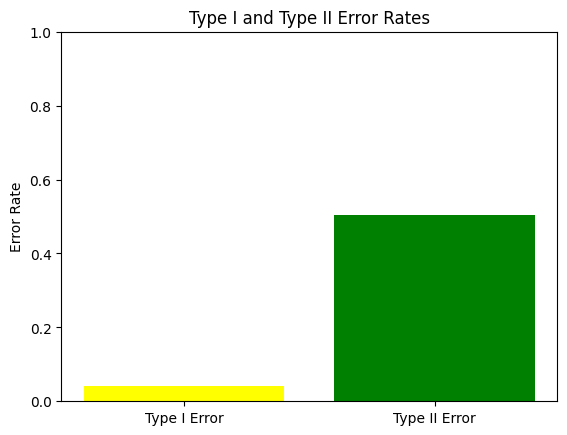

In [11]:
# Plotting the results
labels = ['Type I Error', 'Type II Error']
rates = [type1_error_rate, type2_error_rate]
plt.bar(labels, rates, color=['yellow', 'green'])
plt.ylabel('Error Rate')
plt.title('Type I and Type II Error Rates')
plt.ylim(0, 1)
plt.show()